Y.Abhiram 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv('/home/abhiram1289/Desktop/ml projects/swedish_insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       63 non-null     int64  
 1   Y       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
print(data.columns)
data.head(30)

Index(['X', 'Y'], dtype='object')


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


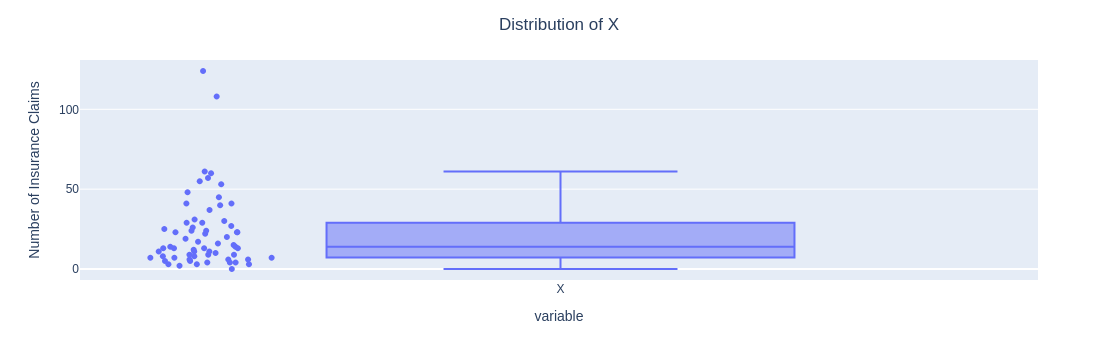

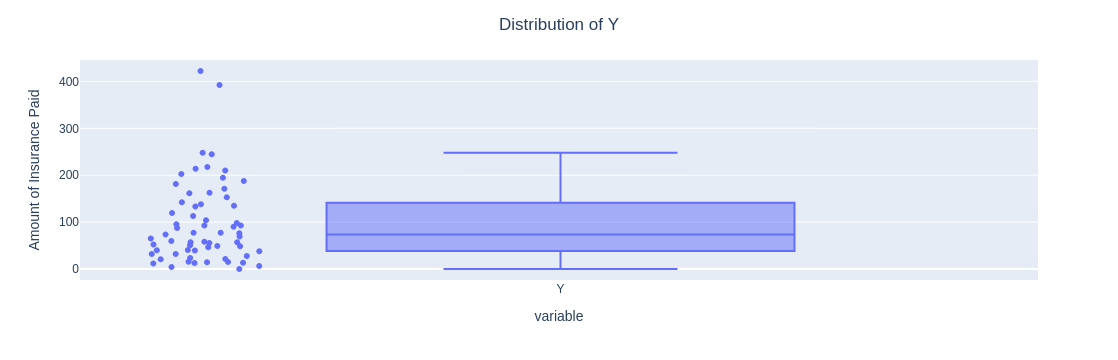

In [8]:
fig = px.box(data['X'], points = 'all')
fig.update_layout(title = f'Distribution of X',title_x=0.5, yaxis_title= "Number of Insurance Claims")
fig.show()

fig = px.box(data['Y'], points = 'all')
fig.update_layout(title = f'Distribution of Y',title_x=0.5, yaxis_title= "Amount of Insurance Paid")
fig.show()

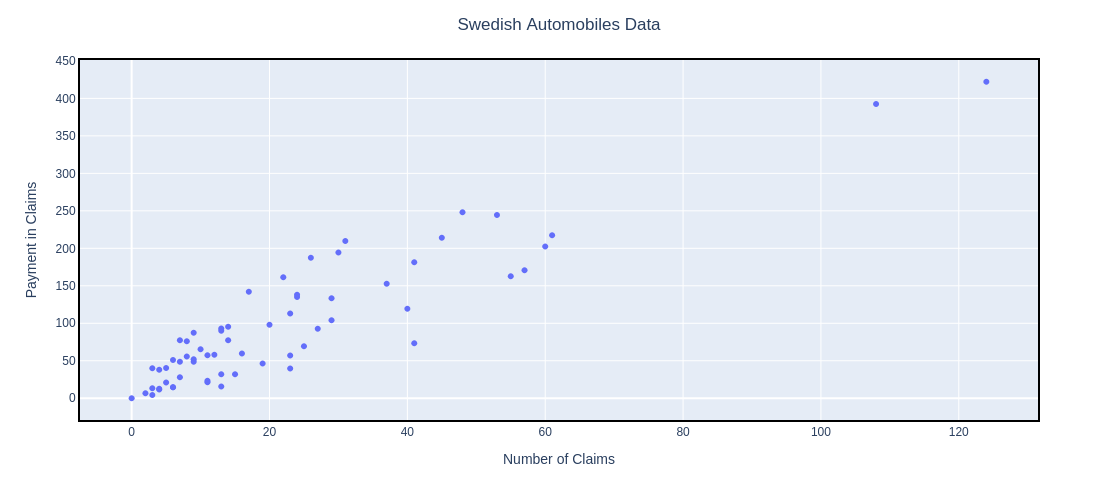

In [10]:
fig = px.scatter(x = data['X'], y=data['Y'])
fig.update_layout(title = 'Swedish Automobiles Data', title_x=0.5, xaxis_title= "Number of Claims", yaxis_title="Payment in Claims", height = 500, width = 700)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

In [16]:
mean_x = np.mean(data['X'])
mean_y = np.mean(data['Y'])

var_x = np.var(data['X'])
var_y = np.var(data['Y'])


print('x stats: mean= %.3f   variance= %.3f' % (mean_x, var_x))
print('y stats: mean= %.3f   variance= %.3f' % (mean_y, var_y))

x stats: mean= 22.905   variance= 536.658
y stats: mean= 98.187   variance= 7505.052


In [35]:
# Calculate covariance between x and y
def covariance(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar/len(x)



covar_xy = covariance(data['X'], data['Y'])
print(f'Cov(X,Y): {covar_xy}')
'''Covariance Formula

For two variables XX and YY, the population covariance is given by:
Cov(X,Y)=1/N(∑i=1 to N (xi−xˉ)(yi−yˉ)

b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')
'''

Cov(X,Y): 1832.0543461829182


'Covariance Formula\n\nFor two variables XX and YY, the population covariance is given by:\nCov(X,Y)=1/N(∑i=1 to N (xi−xˉ)(yi−yˉ)\n\n\n'

In [33]:
'''covar_xy = np.cov(data['X'], data['Y'], ddof=0)[0, 1]
print(f'Cov(X,Y): {covar_xy}')
#np.cov(data['X'], data['Y']): Computes the covariance matrix of X and Y.
#ddof=0: Ensures population covariance by dividing by NN (the default is ddof=1, which calculates the sample covariance by dividing by N−1N−1).
#[0, 1]: Extracts the covariance between X and Y from the covariance matrix. The matrix is symmetric, so [0, 1] or [1, 0] both give the same result.'''

Cov(X,Y): 1832.0543461829175


In [37]:
b1 = covar_xy / var_x
b0 = mean_y - b1 * mean_x

print(f'Coefficents:\n b0: {b0}  b1: {b1} ')

Coefficents:
 b0: 19.99448575911481  b1: 3.413823560066367 


Make Predictions¶
The simple linear regression model is a line defined by coefficients estimated from training data. Once the coefficients are estimated, we can use them to make predictions. The equation to make predictions with a simple linear regression model is as follows:
y^=b0+b1∗x


In [50]:
x = data['X'].values.copy()

print(f'x: {x}')

# Predicting the new data based on calculated coeffiecents. 
y_pre = b0 + b1 * x
print(f'\n\n y: {y_pre}')

y = data['Y'].values
print(f'\n\ny: {y}')

x: [108  19  13 124  40  57  23  14  45  10   5  48  11  23   7   2  24   6
   3  23   6   9   9   3  29   7   4  20   7   4   0  25   6   5  22  11
  61  12   4  16  13  60  41  37  55  41  11  27   8   3  17  13  13  15
   8  29  30  24   9  31  14  53  26]


 y: [388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369  

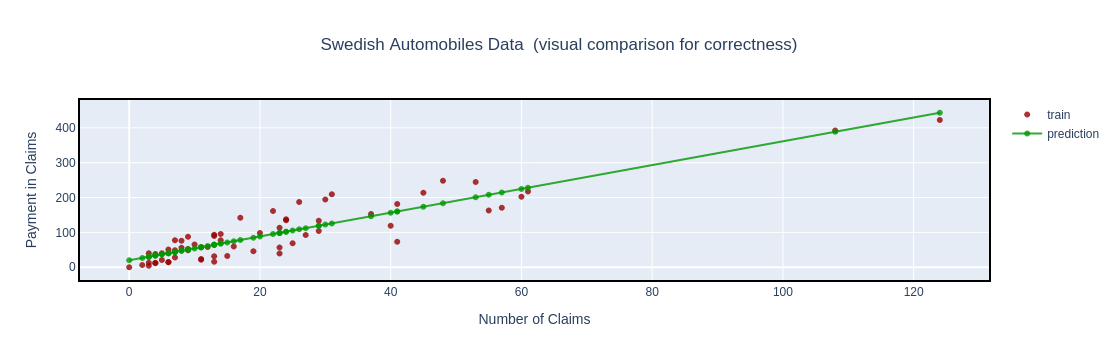

In [52]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=data['X'], y=data['Y'], name='train', mode='markers', marker_color='rgba(152, 0, 0, .8)'))
fig.add_trace(go.Scatter(x=data['X'], y=y_pre, name='prediction', mode='lines+markers', marker_color='rgba(0, 152, 0, .8)'))

fig.update_layout(title = f'Swedish Automobiles Data\n (visual comparison for correctness)',title_x=0.5, xaxis_title= "Number of Claims", yaxis_title="Payment in Claims")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()